# Laboratorio di Simulazione Numerica

## Esercitazione 12

Lo scopo dell'esercitazione è quello di utilizzare due diversi tipi di reti neurali (sequenziale e convoluzionale) per **classificare cifre scritte a mano da 0 a 9**. I dati per eseguire il training delle reti vengono presi dal dataset MINST, utilizzando 70000 cifre, **60000 per il training e 10000 per la validazione del modello**. Le cifre sono in formato di immagini di dimensione $28 \times 28$ pixel.

### Esercizio 12.1

In questo primo esercizio si richiede di utilizzare la rete neurale fornita in laboratorio ed eseguire modifiche andando a vedere in che modo queste influenzano le performance. La rete del primo esercizio è di tipo DNN (deep neural network) sequenziale, presenta un primo layer di input da 784 neuroni (pari alla dimensione delle immagini, $28 \times 28$), un secondo e un terzo layer nascosti da 400 e 100 neuroni, ed infine un layer di output di 10 unità. Lo scopo della rete, infatti, è quello di predere in ingresso un'immagine di 784 pixel e classificarla in una delle 10 possibili cifre da 0 a 9. Ogni nodo del primo layer di input riceve in ingresso un numero compreso fra 0 e 1, il quale rappresenta la gradazione di grigio del singolo pixel (0 = bianco, 1 = nero). Ad ogni epoca viene applicato il comando Dropout con ratio 0.5, il quale "spegne" la metà dei neuroni, rendendo la rete più generale ed applicabile a dataset più ampi. Nell'ultimo passaggio viene utilizzata la funzione di attivazione "Softmax", grazie alla quale ognuna delle dieci componenti del vettore di output sarà un numero compreso fra 0 e 1 e la somma delle componenti sarà 1. In questo modo, le componenti di output possono essere interpretate dalla rete come le probabilità che l'immagine di output corrisponda a una delle dieci cifre fra 0 e 9.

Per questo primo esercizio, proviamo ad utilizzare diversi ottimizzatori, andando a vedere come cambiano i risultati della rete. Per farlo, mostriamo dei plot dell'andamento della loss e dell'accuracy della rete al variare del numero di epoche. Per il training si sono utilizzate 10 epoche.

#### Stochastic Gradient Discent

Per iniziare si è utilizzato come ottimizzatore lo stochastic gradient discent con parametri di default, ossia con learning rate = 0.01, con momento = 0 e momento di Nesterov disattivato.

Di seguito si riportano i grafici dell'andamento di accuracy e loss.

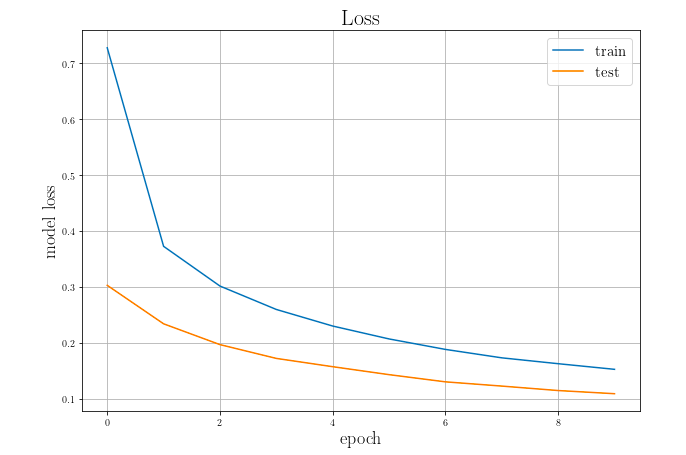
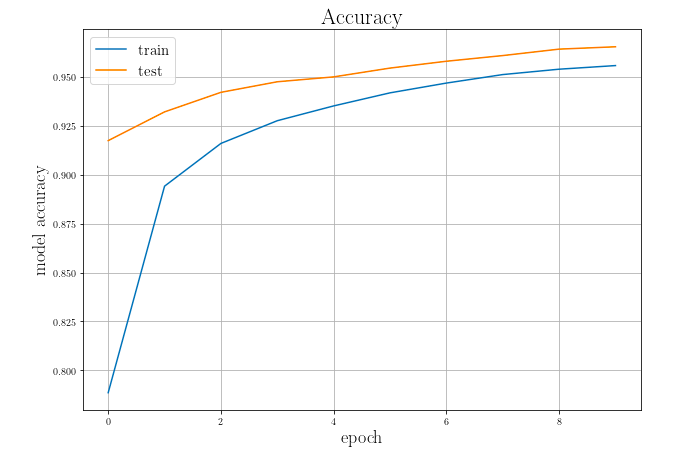

I risultati finali della rete sono: 

- Test loss : 0.108
- Test accuracy : 0.965

Segnaliamo come, in modo apparentemente anomalo, le losses del test sono inferiori rispetto a quelle del training. In generale non ci si aspetta questo tipo di risultato in quanto le losses del test sono calcolate su campioni meno ampi di dati; questo comportamento anomalo è dovuto all'applicazione del "Dropout". Questo infatti viene applicato solo in fase di training e inficia le performance della rete. Tuttavia, "spegnendo" un certo numero di neuroni ad ogni epoca, si costringe al rete ad imparare a riconoscere le immagini con neuroni diversi, rendendola applicabile a dati più generici e quindi in conclusione migliorandone le prestazioni.

#### Stochastic Gradient Discent con momento di Nesterov

Introduciamo ora il momento di Nesterov. Il momento è un termine dipendente dalle iterazioni precedenti, che viene sommato al gradiente nel tentativo di regolarizzare il movimento nello spazio dei parametri. Questa correzione, introdotta da Nesterov, previene movimenti eccessivi nello spazio dei parametri e garantisce significativi miglioramenti nelle performance della rete.

Di seguito si riportano i grafici dell'andamento di accuracy e loss.

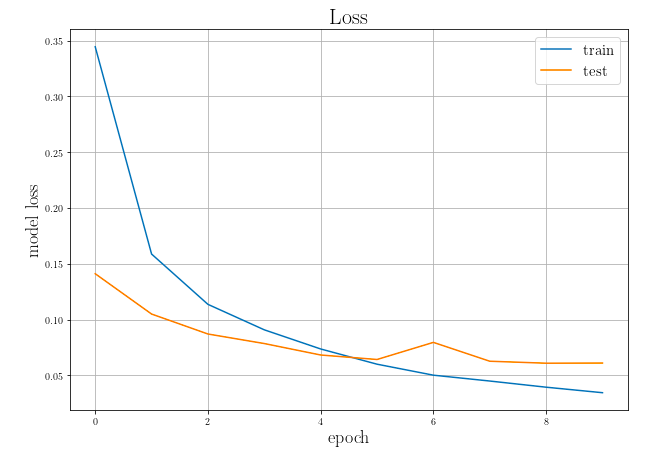
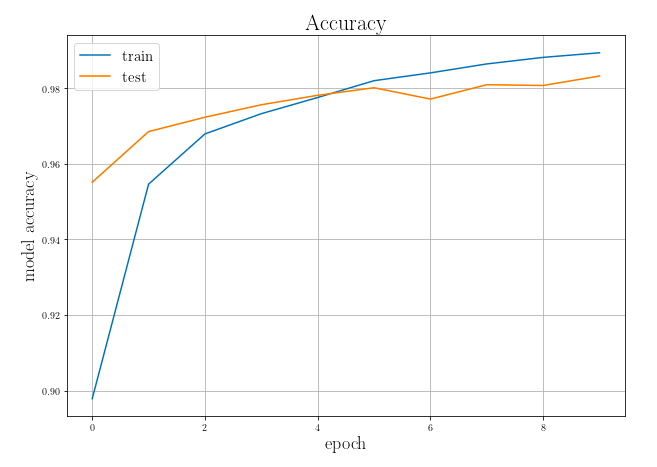

I risultati finali della rete sono: 

- Test loss : 0.06
- Test accuracy : 0.983

#### Adagrad

L'ottimizzatore Adagrad è caratterizzato da learning rates specifici per ogni parametro, i quali vengono adattati in base a quanto frequentemente un paramentro viene aggiornato durante il training.

Di seguito si riportano i grafici dell'andamento di accuracy e loss.

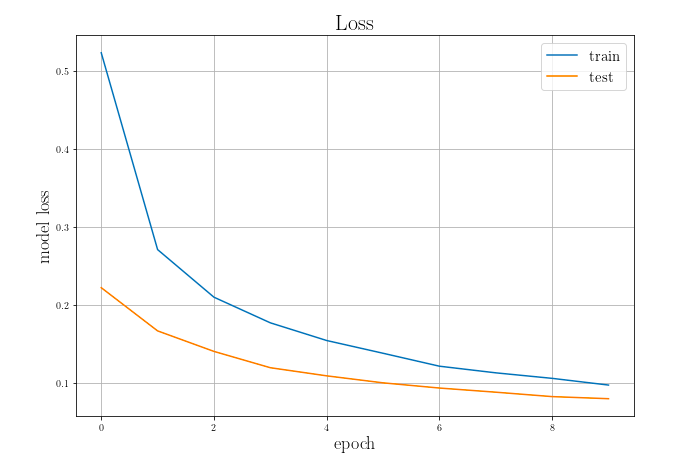
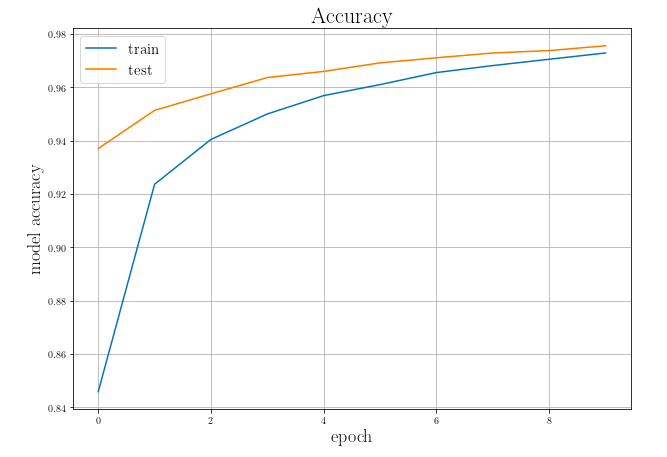

I risultati finali della rete sono: 

- Test loss : 0.079
- Test accuracy : 0.975

#### Adadelta

L'ottimizzatore Adadelta funziona in modo simile all'Adagrad, con la differenza che non tiene conto di tutti i gradienti calcolati, ma solo di alcuni di essi. In questo modo la rete continua ad imparare anche dopo che i parametri sono stati aggiornati molte volte.

Di seguito si riportano i grafici dell'andamento di accuracy e loss.

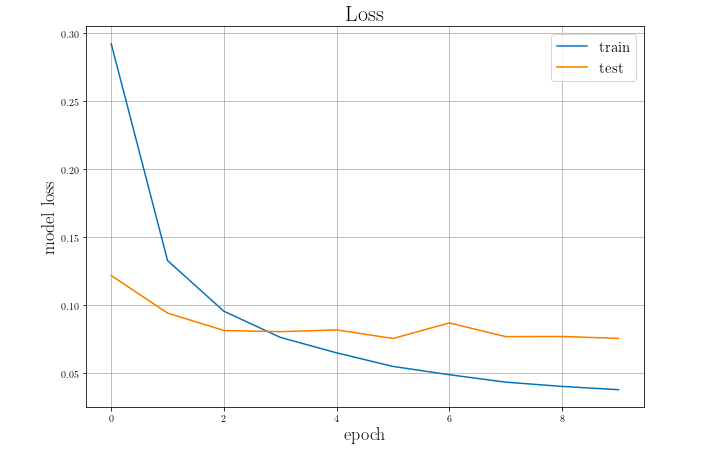
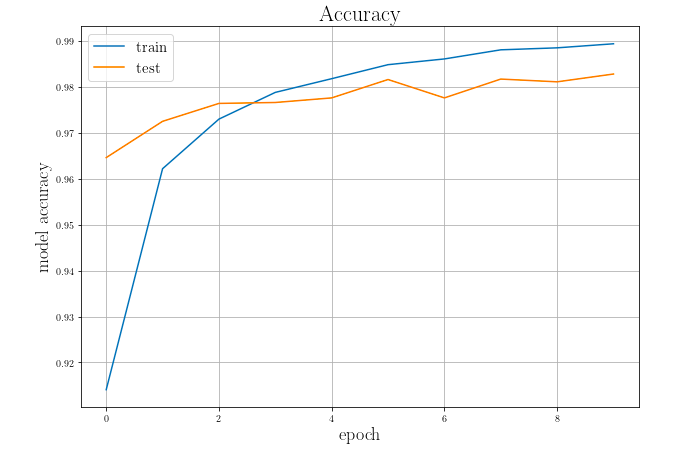

I risultati finali della rete sono: 

- Test loss : 0.07
- Test accuracy : 0.982

Come si vede dai risultati dei training, gli ottimizzatori più performanti sono lo stochastic gradient discent con momento di Nesterov e l'Adadelta. Dunque, rispetto al semplice Stochastic Gradient Discent, introdurre un elemento di "memoria" nella rete che tenga conto del percorso fatto fino a quel punto migliora le prestazioni della rete, tant'è che tutti e tre gli otimizzatori danno risultati migliori rispetto a SGD. Inoltre, si vede come una memoria a "breve termine" come quella coinvolta nelle due reti più performanti (SGD + Nesterov e Adadelta) garantisca i risultati migliori.

### Esercizio 12.2

Lo scopo di questo secondo esercizio è quello di approcciare lo stesso problema del primo esercizio, ma utilizzando una rete neurale convoluzionale, realizzata tramite i metodi Conv2D e MaxPooling2D. Una rete di questo tipo consiste di strati che **filtrano** i dati di input per ottenere informazioni utili. La rete quindi impara dei parametri con i quali modifica i filtri in modo da estrarre le informazioni necessarie. Lo strato convoluzionale 2D viene ottenuto grazie a Conv2D, mentre MaxPooling2D serve a ridurre le dimensioni spaziali della rete. In questo modo il numero di parametri è ridotto, e come conseguenza si ha che **le performance del calcolo migliorano** e c'è **meno probabilità di incorrere in over-fitting**. Quest'ultimo termine indica la situazione per la quale la rete neurale comincia ad "imparare" il rumore presente nei dati di training, ottenendo poi prestazioni negative quando la si applica a nuovi dati diversi da quelli di training.

Per risolvere l'esercizio, dunque, è necessario modificare la struttura della rete DNN in modo da convertirla in una rete convoluzionale. Questo viene fatto nel codice "Esercizio_12.2". Il dato di input è ancora un'immagine $28 \times 28 \times 1$ (c'è un solo parametro per il colore, una scala di grigi). Nel primo strato si applica una convoluzione usando 10 filtri $5 \times 5$, poi si applica un pooling per ridurre la dimensione, e dopo si fa una nuova convoluzione usando 16 filtri $5 \times 5$. Dopo aver applicato nuovamente il pooling, si utilizza il comando Flatten() per mappare l'output 2D di questa rete convoluzionale su un vettore 1D e infine si applica una rete neurale di tipo DNN, formata da due strati di 100 e 50 neuroni. Alla fine della rete si utilizza il metodo "SoftMax" per normalizzare le 10 componenti del vettore finale in modo che siano comprese fra 0 e 1. Nella rete si usa anche il metodo "Dropout", di cui si è già perlato per l'esercizio 12.1.

Dopo aver creato la rete, possiamo testare le sue performance sul data-set di immagini $28 \times 28$ come fatto per la rete neurale sequenziale dell'esercizio precedente. Viste le ottime performance ottenute nella fase precedente, si è deciso di compilare la rete usando come ottimizzatore lo Standard Gradient Discent con momento di Nesterov attivo. 

Di seguito riportiamo i risultati.

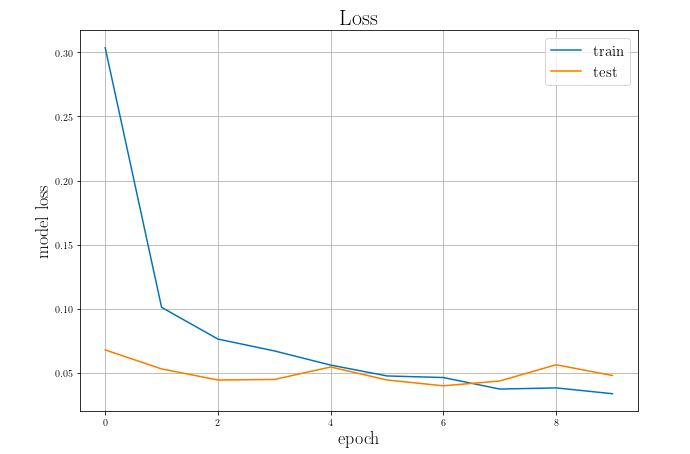
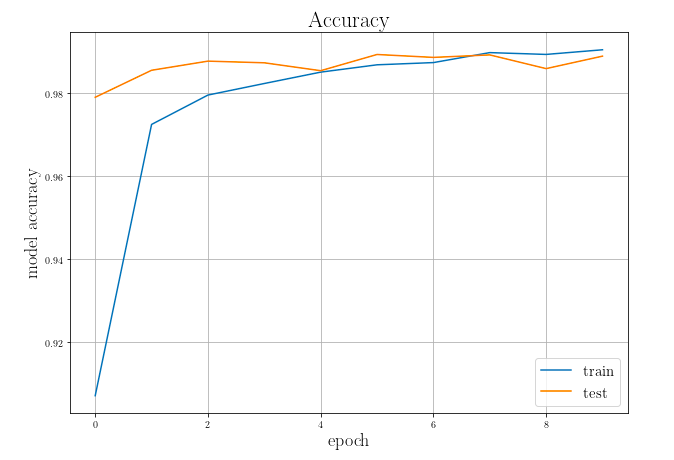

I risultati finali del training sono: 

- Test loss : 0.047
- Test accuracy : 0.988

L'accuracy della rete convoluzionale rasenta il 99% ed è superiore a quella di qualsiasi altra rete sequenziale. Mostriamo i risultati della rete applicati ai dati di test presi dal data set.

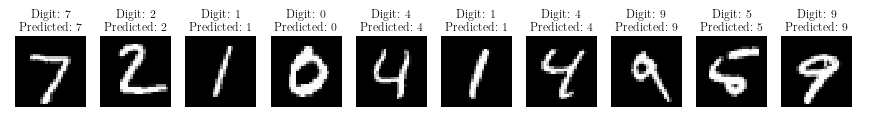

### Esercizio 12.3

Applichiamo ora la rete convoluzionale composta nell'esercizio precedente ad una serie di cifre scritte a mano da noi tramite il software gimp. Recuperiamo la rete neurale convoluzionale dalla cartella /CNN/Saved e mostriamo i risultati. 

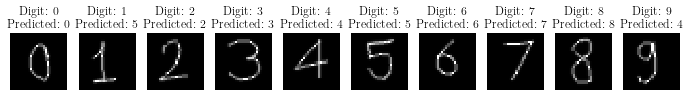

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image
import os
import tensorflow as tf

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

X_test = np.zeros((10,28,28))

for i in range(10):
    digit_filename = "Pictures/" + str(i) + "b.png"
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k,j]=pix[j,k]
    X_test[i] = data

X_test /= 255

save_model_path='CNN/Saved/SGDN'
model_CNN = tf.keras.models.load_model(filepath=save_model_path)

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

predictions = model_CNN.predict(X_test)

plt.figure(figsize=(12, 3))
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(i, np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Come si può vedere, la rete neurale ha successo su 8 delle 10 cifre da noi scritte. I due errori (sulle cifre 1 e 9) sono dovuti ad un modo significativamente diverso fra la nostra scrittura e quella dei dati di training.